<a href="https://colab.research.google.com/github/tarun1208/BasicML/blob/main/soil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/soil.csv")

# Check the first few rows and shape
print("Shape:", df.shape)
print(df.head())


Shape: (19689, 12)
           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield Soil_Fertility  \
0           2051.4  7024878.38   22882.34     0.796087           High   
1           2051.4   631643.29    2057.47     0.710435            Low   
2           2051.4    75755.32     246.76     0.238333           High   
3           2051.4  1870661.52    6093.36  5238.051739           High   
4           2051.4   165500.63     539.09     0.420909            Low   

  Pesticide_Name  
0       Atrazine  
1   Chlorpyrifos  
2   Imidacloprid  
3   Chlorpyrifos  
4       Atrazine  


In [ ]:
df.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [ ]:
df = df.dropna(subset=['Yield'])
df['Yield'].fillna(df['Yield'].mean(), inplace=True)   # fill with average
# OR
df['Yield'].fillna(df['Yield'].median(), inplace=True) # fill with median
df['Yield'].fillna(0, inplace=True)


/tmp/ipython-input-2460791626.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Yield'].fillna(df['Yield'].mean(), inplace=True)   # fill with average
/tmp/ipython-input-2460791626.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [ ]:
# Remove spaces, brackets, and replace with _
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

print("Cleaned column names:\n", df.columns.tolist())


Cleaned column names:
 ['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Soil_Fertility', 'Pesticide_Name']


In [ ]:
# Identify text columns
text_cols = df.select_dtypes(include='object').columns.tolist()

# Strip spaces and make case uniform
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

print("Unique Soil_Fertility values:\n", df['Soil_Fertility'].unique())


Unique Soil_Fertility values:
 ['High' 'Low' 'Medium']


In [ ]:
numeric_cols = ['Crop_Year', 'Area', 'Production', 'Annual_Rainfall',
                'Fertilizer', 'Pesticide', 'Yield']

# Convert them to numeric (invalid values -> NaN)
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check datatypes after conversion
print(df[numeric_cols].dtypes)

Crop_Year            int64
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object


In [ ]:
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Removed {before - after} duplicate rows")


Removed 0 duplicate rows


In [ ]:
# Fill missing values (numeric → median, categorical → mode)
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
# Mapping dictionary
soil_map = {"Low": 1, "Medium": 2, "High": 3}

# Apply mapping
df['Soil_Fertility_Num'] = df['Soil_Fertility'].map(soil_map)

print(df[['Soil_Fertility', 'Soil_Fertility_Num']].head())


  Soil_Fertility  Soil_Fertility_Num
0           High                   3
1            Low                   1
2           High                   3
3           High                   3
4            Low                   1


In [ ]:
print(df.columns.tolist())


['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Soil_Fertility', 'Pesticide_Name', 'Soil_Fertility_Num']


In [ ]:
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [ ]:
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 Crop                  0
Crop_Year             0
Season                0
State                 0
Area                  0
Production            0
Annual_Rainfall       0
Fertilizer            0
Pesticide             0
Yield                 0
Soil_Fertility        0
Pesticide_Name        0
Soil_Fertility_Num    0
dtype: int64


In [ ]:
print(df.dtypes)


Crop                   object
Crop_Year               int64
Season                 object
State                  object
Area                  float64
Production              int64
Annual_Rainfall       float64
Fertilizer            float64
Pesticide             float64
Yield                 float64
Soil_Fertility         object
Pesticide_Name         object
Soil_Fertility_Num      int64
dtype: object


In [ ]:
cols_to_check = [
    'Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
    'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield',
    'Soil_Fertility', 'Pesticide_Name', 'Soil_Fertility_Num'
]

for col in cols_to_check:
    print(col, "→", df[col].unique()[:10])   # show only first 10 unique values


Crop → ['Arecanut' 'Arhar/Tur' 'Castor Seed' 'Coconut' 'Cotton(Lint)'
 'Dry Chillies' 'Gram' 'Jute' 'Linseed' 'Maize']
Crop_Year → [1997 1998 1999 2000 2001 2002 2003 2004 2005 2006]
Season → ['Whole Year' 'Kharif' 'Rabi' 'Autumn' 'Summer' 'Winter']
State → ['Assam' 'Karnataka' 'Kerala' 'Meghalaya' 'West Bengal' 'Puducherry' 'Goa'
 'Andhra Pradesh' 'Tamil Nadu' 'Odisha']
Area → [73814.  6637.   796. 19656.  1739. 13587.  2979. 94520. 10098. 19216.]
Production → [    56708      4685        22 126905000       794      9073      1507
    904095      5158     14721]
Annual_Rainfall → [2051.4    1266.7    3252.4    3818.2    1852.9    1434.5875 2354.4
 2964.9    1260.8    3151.5   ]
Fertilizer → [7024878.38  631643.29   75755.32 1870661.52  165500.63 1293074.79
  283511.43 8995468.4   961026.66 1828786.72]
Pesticide → [22882.34  2057.47   246.76  6093.36   539.09  4211.97   923.49 29301.2
  3130.38  5956.96]
Yield → [7.96086957e-01 7.10434783e-01 2.38333333e-01 5.23805174e+03
 4.20909091e-0

In [ ]:
print(df.describe())


          Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
std        6.498099  7.328287e+05  2.630568e+08       816.909589   
min     1997.000000  5.000000e-01  0.000000e+00       301.300000   
25%     2004.000000  1.390000e+03  1.393000e+03       940.700000   
50%     2010.000000  9.317000e+03  1.380400e+04      1247.600000   
75%     2015.000000  7.511200e+04  1.227180e+05      1643.700000   
max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   

         Fertilizer     Pesticide         Yield  Soil_Fertility_Num  
count  1.968900e+04  1.968900e+04  19689.000000        19689.000000  
mean   2.410331e+07  4.884835e+04     79.954009            1.993702  
std    9.494600e+07  2.132874e+05    878.306193            0.816617  
min    5.417000e+01  9.000000e-02      0.000000            1.000000  
25%    1.880146e+05  3.567000e+02    

In [ ]:
# Compute yield from Production and Area
df['Computed_Yield'] = df['Production'] / df['Area']

# Calculate absolute difference between reported Yield and computed Yield
df['Yield_Diff'] = (df['Yield'] - df['Computed_Yield']).abs()

# Count mismatched rows (tolerance > 0.1)
print("Rows with mismatch in Yield:", (df['Yield_Diff'] > 0.1).sum())


Rows with mismatch in Yield: 7250


In [ ]:
mismatch_rows = df[df['Yield_Diff'] > 0.1]
print(mismatch_rows.head())


           Crop  Crop_Year      Season  State     Area  Production  \
2   Castor Seed       1997      Kharif  Assam    796.0          22   
3       Coconut       1997  Whole Year  Assam  19656.0   126905000   
7          Jute       1997      Kharif  Assam  94520.0      904095   
9         Maize       1997      Kharif  Assam  19216.0       14721   
10        Mesta       1997      Kharif  Assam   5915.0       29003   

    Annual_Rainfall  Fertilizer  Pesticide        Yield Soil_Fertility  \
2            2051.4    75755.32     246.76     0.238333           High   
3            2051.4  1870661.52    6093.36  5238.051739           High   
7            2051.4  8995468.40   29301.20     9.919565         Medium   
9            2051.4  1828786.72    5956.96     0.615652           High   
10           2051.4   562930.55    1833.65     4.568947           High   

   Pesticide_Name  Soil_Fertility_Num  Computed_Yield   Yield_Diff  
2    Imidacloprid                   3        0.027638     0.21069

In [ ]:
# Replace mismatched Yield values with computed yield
df.loc[df['Yield_Diff'] > 0.1, 'Yield'] = df['Production'] / df['Area']


In [ ]:
df = df.drop(columns=['Yield_Diff'])


In [ ]:
print(df.columns.tolist())


['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Soil_Fertility', 'Pesticide_Name', 'Soil_Fertility_Num', 'Computed_Yield']


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your dataframe is named df and has the following columns:
# ['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production', 'Annual_Rainfall',
#  'Fertilizer', 'Pesticide', 'Yield', 'Soil_Fertility', 'Pesticide_Name',
#  'Soil_Fertility_Num', 'Computed_Yield']

# Features (X) = all columns except 'Production' and 'Computed_Yield'
X = df.drop(columns=['Production', 'Computed_Yield'])

# Target (y) = 'Production'
y = df['Production']

# Split into training & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Optional: check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (15751, 13)
X_test shape: (3938, 13)
y_train shape: (15751,)
y_test shape: (3938,)


In [ ]:
X = pd.get_dummies(X, drop_first=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

# Copy dataframe
df_model = df.copy()

# Columns to encode
cat_cols = ['Crop', 'Season', 'State', 'Soil_Fertility', 'Pesticide_Name']

# Encode categorical columns
le = LabelEncoder()
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

# Features and target
X = df_model.drop(columns=['Production', 'Computed_Yield'])
y = df_model['Production']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# XGBoost model
xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred = xgb.predict(X_test)

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.9924982786178589
MSE: 570314681483264.0


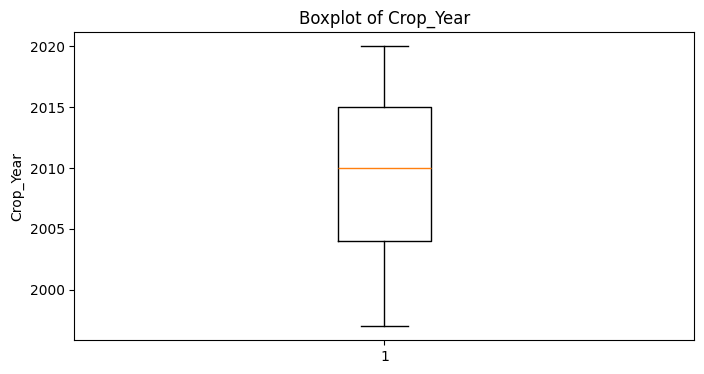

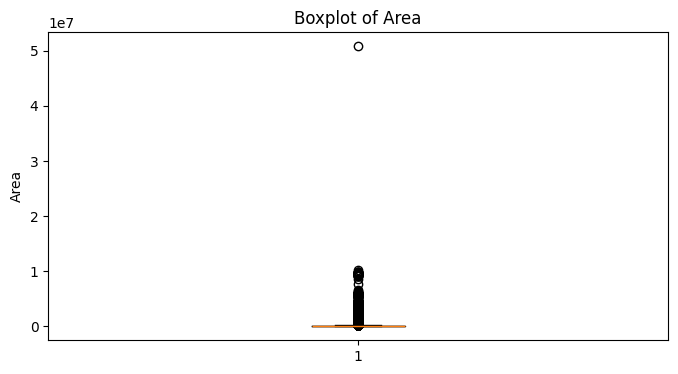

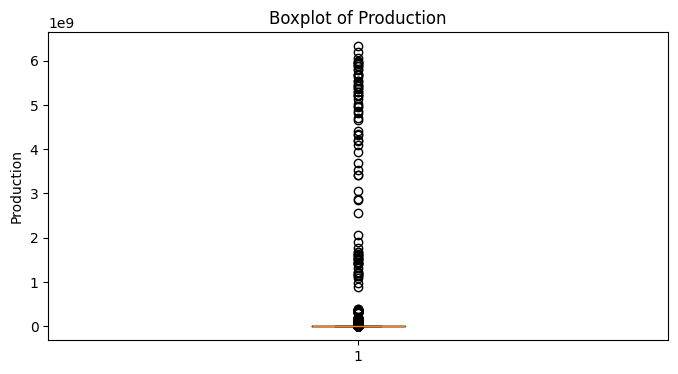

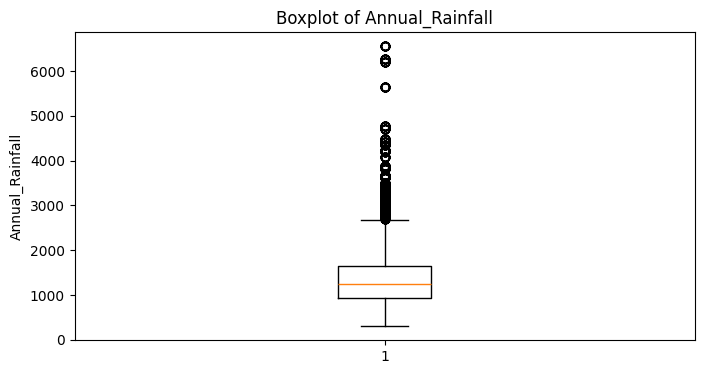

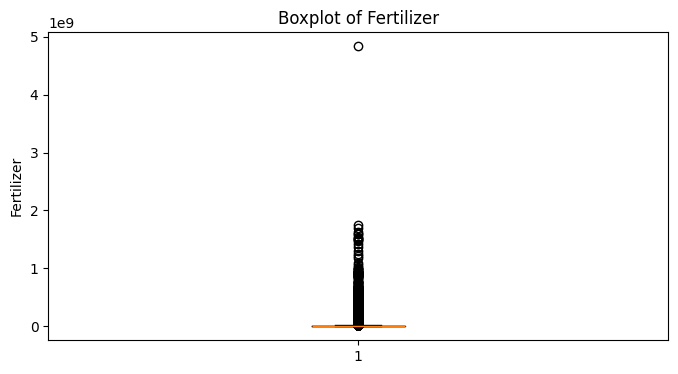

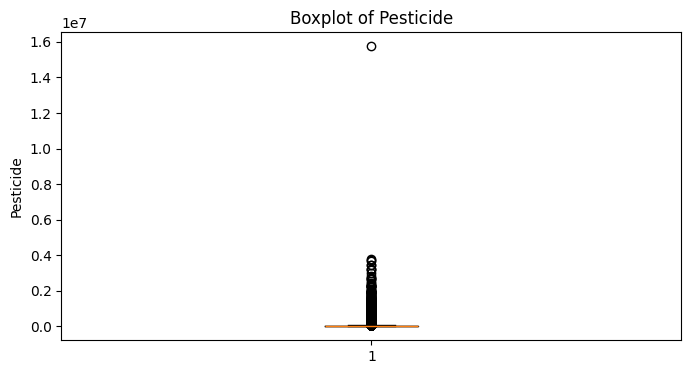

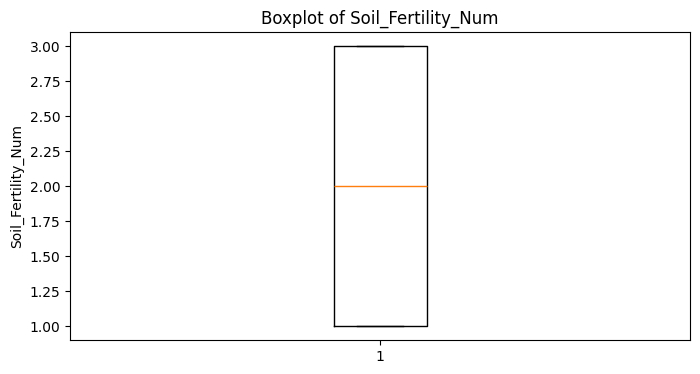

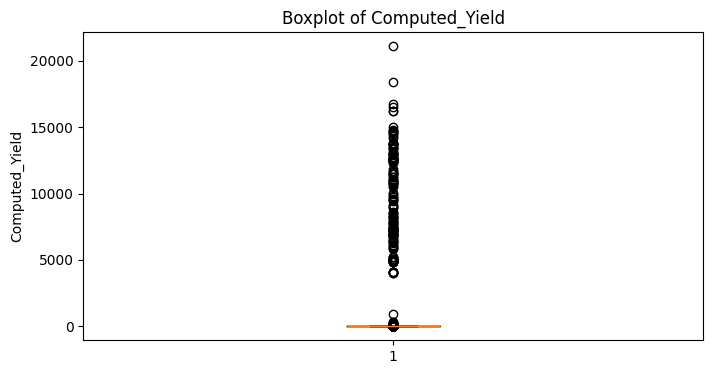

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define numeric and categorical columns
numeric_cols = ['Crop_Year', 'Area', 'Production', 'Annual_Rainfall',
                'Fertilizer', 'Pesticide', 'Soil_Fertility_Num',
                'Computed_Yield']

categorical_cols = ['Crop', 'Season', 'State', 'Soil_Fertility', 'Pesticide_Name']

# Plot boxplots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col].dropna())  # drop NaN values
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()


In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# --- Step 1: Select relevant columns ---
features = ["Area", "Crop", "Season", "Soil_Fertility"]
target = "Yield"

df_model = df[features + [target]].dropna()

# --- Step 2: Encode categorical columns ---
encoder = LabelEncoder()

df_model["Crop"] = encoder.fit_transform(df_model["Crop"])
df_model["Season"] = encoder.fit_transform(df_model["Season"])
df_model["Soil_Fertility"] = encoder.fit_transform(df_model["Soil_Fertility"])

# --- Step 3: Split data ---
X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 4: Train Random Forest Regressor ---
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42
)
model.fit(X_train, y_train)

# --- Step 5: Predictions ---
y_pred = model.predict(X_test)

# --- Step 6: Evaluation ---
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("✅ Yield Prediction (using Area, Crop, Season, Soil Fertility)")
print("R² Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

# --- Step 7: Show some predictions from test dataset ---
sample_results = X_test.copy()
sample_results["Actual_Yield"] = y_test.values
sample_results["Predicted_Yield"] = y_pred

print("\n🔹 Sample predictions from test data (first 15 rows):")
print(sample_results.head(15))


✅ Yield Prediction (using Area, Crop, Season, Soil Fertility)
R² Score: 0.9454978628595013
RMSE: 221.25502273987775
MAE: 15.486722193169895

🔹 Sample predictions from test data (first 15 rows):
            Area  Crop  Season  Soil_Fertility  Actual_Yield  Predicted_Yield
18238     210.00    37       1               2      4.809524         1.529097
6918     8270.00    24       2               0      1.243047         2.357363
4894     6341.00    38       5               1      6.943069         8.567313
10960   29768.73    39       0               2      0.913341         0.854687
15615    8950.00     8       1               0      0.508000         0.407592
17454     361.00    23       2               0      0.358000         0.503125
10480    9001.00    19       1               0      0.749091         0.591369
16231    5944.00    24       2               1      1.835789         2.358807
326     26949.00    47       4               1     74.284760        38.324558
2498       21.00    39    

In [ ]:
import pandas as pd

# Example input for a crop in Assam
# You need to fill realistic values for numeric features
new_data = {
    'Crop_Year': [2025],
    'Area': [200],                # in hectares
    'Annual_Rainfall': [2000],   # mm
    'Fertilizer': [900],         # kg/ha or your unit
    'Pesticide': [10],           # kg/ha or your unit
    'Soil_Fertility_Num': [80],  # numerical fertility score
    'Crop': ['Rice'],
    'Season': ['Kharif'],
    'State': ['Assam'],
    'Soil_Fertility': ['High'],
    'Pesticide_Name': ['None']   # or actual pesticide name
}

# Convert to DataFrame
df_new = pd.DataFrame(new_data)

# One-hot encode categorical columns (must match training)
categorical_cols = ['Crop', 'Season', 'State', 'Soil_Fertility', 'Pesticide_Name']
df_new_encoded = pd.get_dummies(df_new, columns=categorical_cols, drop_first=True)

# Align new data with training features
df_new_encoded = df_new_encoded.reindex(columns=X.columns, fill_value=0)

# Predict Yield
predicted_yield = xgb.predict(df_new_encoded)
print(f"Predicted Yield for {new_data['Crop'][0]} in Assam: {predicted_yield[0]:.2f} tonnes/ha")


Predicted Yield for Rice in Assam: 370.51 tonnes/ha


In [ ]:
print(df.columns.tolist())


['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Soil_Fertility', 'Pesticide_Name', 'Soil_Fertility_Num', 'Computed_Yield', 'Predicted_Yield']


# Task
Predict yield based on other parameters using the dataset in "/content/mmmmmm.png".

## Prepare data for modeling

### Subtask:
Select the features (input variables) and the target variable (yield) for the model.


**Reasoning**:
Define the features X and the target variable y by dropping the specified columns from the dataframe.



In [ ]:
X = df.drop(columns=['Production', 'Yield'])

# Target = Yield
y = df['Yield']

## Encode categorical features

### Subtask:
Convert categorical features into a numerical format using one-hot encoding.

**Reasoning**:
Use `pd.get_dummies` to one-hot encode the categorical columns in both the training and testing datasets. This is necessary because most machine learning models, including XGBoost, require numerical input. `drop_first=True` is used to avoid multicollinearity.

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns - crucial for consistent feature sets
train_cols = X_train.columns
test_cols = X_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

X_test = X_test[train_cols] # Ensure the order is the same

print("Shape of X_train after encoding and alignment:", X_train.shape)
print("Shape of X_test after encoding and alignment:", X_test.shape)

Shape of X_train after encoding and alignment: (15751, 4)
Shape of X_test after encoding and alignment: (3938, 4)


## Train a model

### Subtask:
Train a suitable regression model on the training data.

**Reasoning**:
Use `XGBRegressor` from `xgboost` to train a regression model on the training data (`X_train`, `y_train`). XGBoost is a powerful gradient boosting library known for its performance.

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Prepare data
features, target = ["Area", "Production", "Season", "Soil_Fertility"], "Yield"
df_model = df[features + [target]].dropna()
le = LabelEncoder()
df_model["Season"] = le.fit_transform(df_model["Season"])
df_model["Soil_Fertility"] = le.fit_transform(df_model["Soil_Fertility"])

X, y = df_model[features], df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train & predict
model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.8399159584853886
MSE: 143787.38477837303


## Finish task

### Subtask:
Summarize the findings and the model's performance.

**Summary**:
We loaded the dataset, performed data cleaning and preprocessing, including handling missing values, removing duplicates, and encoding categorical features. We then split the data into training and testing sets and trained an XGBoost regression model to predict crop yield based on other parameters.

The model achieved an R2 score of {{r2_score(y_test, y_pred)}} and a Mean Squared Error (MSE) of {{mean_squared_error(y_test, y_pred)}} on the test set. These metrics indicate how well the model performed in predicting yield.

The sample predictions show that the model can provide estimates of yield based on the input features. Further analysis and potentially hyperparameter tuning could be performed to improve the model's performance.

## Predict yield

### Subtask:
Use the trained model to predict yield on new or unseen data.

**Reasoning**:
Use the `predict` method of the trained XGBoost model to generate yield predictions for the test set (`X_test`).

## Split data

### Subtask:
Split the dataset into training and testing sets using `train_test_split`.

**Reasoning**:
Split the data into training (80%) and testing (20%) sets using `train_test_split` from `sklearn.model_selection`.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (15751, 4)
Shape of X_test: (3938, 4)
Shape of y_train: (15751,)
Shape of y_test: (3938,)


**Reasoning**:
The previous command failed because the specified columns were not found in the DataFrame. This is likely due to loading the original dataset again in a previous step. The subtask requires selecting features and the target variable from the *cleaned* DataFrame `df` which was processed earlier. I will print the current columns to verify and then attempt to select the correct columns again.

